In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import pylab
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

# Importing Titanic Dataset

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Checking Shape

In [3]:
df.shape

(891, 15)

### Checking datatype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Pre-Processing

### Part-1 : Check Missing Values

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# age            177
# embarked         2
# deck           688
# embark_town      2

print('age :', 177/891)
print('embarked :', 2/891)
print('deck :', 688/891)
print('embark_town :', 2/891)

age : 0.19865319865319866
embarked : 0.002244668911335578
deck : 0.7721661054994389
embark_town : 0.002244668911335578


## Obeservations:
### 'age', 'embarked', 'embark_town' are less than threshold of 25% missing data, we need to impute it
### 'deck' is more than threshold of 25% missing data, we need to drop the variable

In [7]:
df = df.drop(['deck'], axis=1)

### Filling missing values

<AxesSubplot:ylabel='age'>

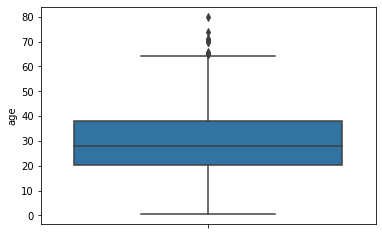

In [8]:
# Age - Number
sns.boxplot(y= 'age', data=df)

In [9]:
#Since outlier is there use median approach
df['age'] = df['age'].fillna(df['age'].median())

In [10]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [11]:
print(df['embarked'].value_counts())
print(df['embark_town'].value_counts())

S    644
C    168
Q     77
Name: embarked, dtype: int64
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64


### Observation: Since Embarked & Embark_town are the same, we need to drop one variable to avoid multi-collinearity

In [12]:
df = df.drop(['embark_town'], axis=1)

### filling the missing values in 'embarked'

In [13]:
df['embarked'] = df['embarked'].fillna('S')

In [14]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

### Checking the values in all variables

In [15]:
df.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female  28.0      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

In [16]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [17]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [18]:
df['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [19]:
df['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [20]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [21]:
df['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [22]:
df['adult_male'].value_counts()

True     537
False    354
Name: adult_male, dtype: int64

In [23]:
df['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [24]:
df['alone'].value_counts()

True     537
False    354
Name: alone, dtype: int64

In [25]:
df = df.drop(['adult_male','alive','fare','alone','pclass'], axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       891 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   embarked  891 non-null    object  
 6   class     891 non-null    category
 7   who       891 non-null    object  
dtypes: category(1), float64(1), int64(3), object(3)
memory usage: 49.9+ KB


### Pre-Processing Part-2 : Encoding Concept
##### 1) Label Encoder
##### 2) One Hot Encoder
##### 3) Dummy Variable

In [27]:
#Label Encoder
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')
df['class'] = df['class'].astype('category')
df['who'] = df['who'].astype('category')

#One Hot Encoder(Converting char to number)
df['sex'] = df['sex'].cat.codes
df['embarked'] = df['embarked'].cat.codes
df['class'] = df['class'].cat.codes
df['who'] = df['who'].cat.codes

#Dummy Variable
df = pd.get_dummies(df, columns=['sex','embarked','class','who'])

In [28]:
df.head()

,survived,age,sibsp,parch,sex_0,sex_1,embarked_0,embarked_1,embarked_2,class_0,class_1,class_2,who_0,who_1,who_2
0,0,22.0,1,0,0,1,0,0,1,0,0,1,0,1,0
1,1,38.0,1,0,1,0,1,0,0,1,0,0,0,0,1
2,1,26.0,0,0,1,0,0,0,1,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,0,1,1,0,0,0,0,1
4,0,35.0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [29]:
df.columns

Index(['survived', 'age', 'sibsp', 'parch', 'sex_0', 'sex_1', 'embarked_0',
       'embarked_1', 'embarked_2', 'class_0', 'class_1', 'class_2', 'who_0',
       'who_1', 'who_2'],
      dtype='object')

### dropping the dummy variables

In [30]:
df = df.drop(['sex_0','embarked_0','class_0','who_0'], axis=1)

In [31]:
df.head()

,survived,age,sibsp,parch,sex_1,embarked_1,embarked_2,class_1,class_2,who_1,who_2
0,0,22.0,1,0,1,0,1,0,1,1,0
1,1,38.0,1,0,0,0,0,0,0,0,1
2,1,26.0,0,0,0,0,1,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0,0,1
4,0,35.0,0,0,1,0,1,0,1,1,0


### Pre-Processing Part-3: Checking Outlier:Not required because it classification problem

### Pre-Processing Part-4: Feature Scaling :Not required because it classification problem

### Pre-processing Part-5: Checking whether dataset is blanced or not

In [32]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

#### imbalance dataset (majority_class > 2*minority_class)
    549 < 2*342
    hence, this is a balance dataset and also it is linearly seperable


### Checking Correlation

In [33]:
df.corr()

,survived,age,sibsp,parch,sex_1,embarked_1,embarked_2,class_1,class_2,who_1,who_2
survived,1.000000,-0.064910,-0.035322,0.081629,-0.543351,0.003650,-0.149683,0.093349,-0.322308,-0.557080,0.506562
age,-0.064910,1.000000,-0.233296,-0.172482,0.081163,-0.031415,-0.006729,0.015831,-0.291955,0.247704,0.094306
sibsp,-0.035322,-0.233296,1.000000,0.414838,-0.114631,-0.026354,0.068734,-0.055932,0.092548,-0.253586,0.047071
parch,0.081629,-0.172482,0.414838,1.000000,-0.245489,-0.081228,0.060814,-0.000734,0.015790,-0.349943,0.150167
sex_1,-0.543351,0.081163,-0.114631,-0.245489,1.000000,-0.074115,0.119224,-0.064746,0.137143,0.908578,-0.896214
embarked_1,0.003650,-0.031415,-0.026354,-0.081228,-0.074115,1.000000,-0.499421,-0.127301,0.237449,-0.076789,0.100544
embarked_2,-0.149683,-0.006729,0.068734,0.060814,0.119224,-0.499421,1.000000,0.189980,-0.015104,0.106125,-0.111914
class_1,0.093349,0.015831,-0.055932,-0.000734,-0.064746,-0.127301,0.189980,1.000000,-0.565210,-0.067400,0.060483
class_2,-0.322308,-0.291955,0.092548,0.015790,0.137143,0.237449,-0.015104,-0.565210,1.000000,0.106416,-0.173333
who_1,-0.557080,0.247704,-0.253586,-0.349943,0.908578,-0.076789,0.106125,-0.067400,0.106416,1.000000,-0.814281


### Visualise the correlation 

<AxesSubplot:>

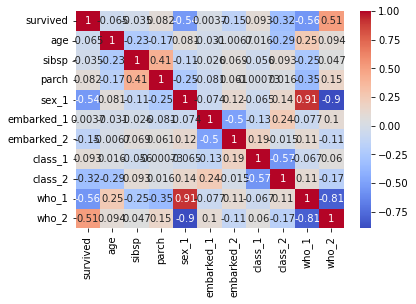

In [34]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Checking  whether the data is linearly separable or not

<AxesSubplot:xlabel='age', ylabel='survived'>

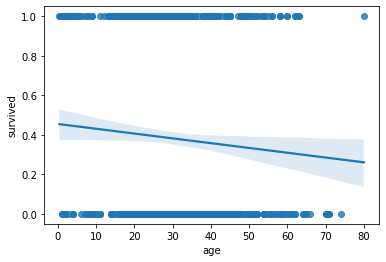

In [35]:
sns.regplot(x='age', y='survived', data=df)

### Splitting the data into Independent variable and dependent variable

In [36]:
x = df.iloc[:,1:]
x.head()

,age,sibsp,parch,sex_1,embarked_1,embarked_2,class_1,class_2,who_1,who_2
0,22.0,1,0,1,0,1,0,1,1,0
1,38.0,1,0,0,0,0,0,0,0,1
2,26.0,0,0,0,0,1,0,1,0,1
3,35.0,1,0,0,0,1,0,0,0,1
4,35.0,0,0,1,0,1,0,1,1,0


In [37]:
y = df.iloc[:,0]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

### Splitting the data into Training and Test

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.75,random_state=101)

print(x_train.shape)
print(y_train.shape)
print('##################')
print(x_test.shape)
print(y_test.shape)

(668, 10)
(668,)
##################
(223, 10)
(223,)


### Building Generalised Linear Model(Logistic Regression Model)

In [39]:
logit_model = LogisticRegression()

In [40]:
#Fitting the model
logit_model.fit(x_train, y_train)

LogisticRegression()

### Predicting the Model using Logit

In [41]:
y_pred_train_logit = logit_model.predict(x_train)
y_pred_test_logit = logit_model.predict(x_test)

In [42]:
# generate model performance metrics

accuracy_train_lr = accuracy_score(y_train,y_pred_train_logit)
accuracy_test_lr = accuracy_score(y_test,y_pred_test_logit)
f1_lr=f1_score(y_test,y_pred_test_logit)
precision_lr = precision_score(y_test,y_pred_test_logit)
recall_lr = recall_score(y_test,y_pred_test_logit)
roc_auc_lr = roc_auc_score(y_test,y_pred_test_logit)

print('Accuracy of train is :', accuracy_train_lr)
print('Accuracy of test is :', accuracy_test_lr)
print('F1 Score is :', f1_lr)
print('Precision is :',precision_lr)
print('Recall is :',recall_lr)
print('Area under the curve is :', roc_auc_lr)

Accuracy of train is : 0.8338323353293413
Accuracy of test is : 0.7937219730941704
F1 Score is : 0.7356321839080459
Precision is : 0.8205128205128205
Recall is : 0.6666666666666666
Area under the curve is : 0.7782152230971128


# Conclusion for Logistic regression
We obtain a good F1 score of 73%
However, we can further try to improve the obtained accuracy which is 79%
The recall obtained is poor i.e. 66% but the precision is good which is 82%

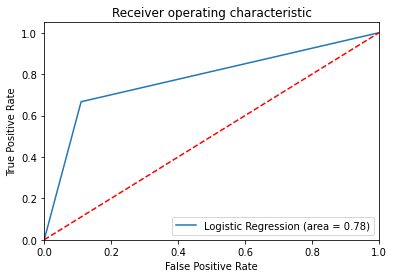

In [43]:
# ROC curve

logit_roc_auc = roc_auc_score(y_test, y_pred_test_logit)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_logit)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Using K-Fold Method to increase the train & test accuracy(Cross Validation method)

In [44]:
accuracy_train_cv_log = cross_val_score(logit_model, x_train, y_train, cv=20)
accuracy_test_cv_log = cross_val_score(logit_model, x_test, y_test, cv=20)

print(accuracy_train_cv_log)
print('###########')
print(accuracy_test_cv_log)

[0.88235294 0.91176471 0.82352941 0.73529412 0.82352941 0.88235294
 0.70588235 0.85294118 1.         0.75757576 0.75757576 0.6969697
 0.84848485 0.90909091 0.84848485 0.78787879 0.84848485 0.75757576
 0.75757576 0.90909091]
###########
[0.91666667 0.83333333 0.91666667 0.72727273 0.72727273 0.54545455
 0.90909091 0.63636364 0.72727273 0.90909091 0.90909091 0.72727273
 0.63636364 0.81818182 0.81818182 0.81818182 0.72727273 0.72727273
 0.54545455 0.72727273]


In [45]:
print(accuracy_train_cv_log[1])
print('###########')
print(accuracy_test_cv_log[0])

0.9117647058823529
###########
0.9166666666666666


### Conclusion
Using K-Fold method we got the accuracy train as 91% and test as 91%